In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data 
cars=pd.read_csv('used_cars_data.csv')
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
cars.shape

(7253, 14)

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [5]:
cars.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
cat_cols=cars.describe(include="O").columns.to_list()

In [8]:
num_cols=cars.describe().columns.to_list()

In [9]:
cars.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [12]:
cat_cols

['Name',
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'New_Price']

In [15]:
# EDA for categorical features
coll=[ 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
"Seats","Year"]
for column in coll:
    print(column)
    print(cars[column].value_counts())
    print("="*50)

Location
Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
Transmission
Manual       5204
Automatic    2049
Name: Transmission, dtype: int64
Owner_Type
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64
Seats
5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64
Year
2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998      4
1999      2
1996 

In [21]:
# clean the data
cars[["Engine","Power","Mileage"]]

,Engine,Power,Mileage
0,998,58.16,26.6
1,1582,126.2,19.67
2,1199,88.7,18.2
3,1248,88.76,20.77
4,1968,140.8,15.2
...,...,...,...
7248,1598,103.6,20.54
7249,1197,103.6,17.21
7250,1461,63.1,23.08
7251,1197,103.6,17.2


In [18]:
cars["Mileage"]=cars.Mileage.str.rstrip(" kmpl")
cars["Mileage"]=cars.Mileage.str.rstrip(" km/kg")

In [20]:
cars["Engine"]=cars.Engine.str.rstrip(" CC")
cars["Power"]=cars.Power.str.rstrip("bhp")

In [46]:
condition=cars["Seats"]==0
cars[condition]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3999,3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197,NaN,0.0,NaN,18.0


In [47]:
cars["Power"]=cars["Power"].str.strip().replace("null",np.nan)
cars.loc[cars["Mileage"]=='0.0',"Mileage"]=np.nan
cars.loc[cars["Engine"]=='0.0',"Engine"]=np.nan
cars.loc[cars["Seats"]=='0.0',"Seats"]=np.nan

In [48]:
cars.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [49]:
# converting dtypes (categorical features)
cars["Fuel_Type"]=cars["Fuel_Type"].astype("category")
cars["Transmission"]=cars["Transmission"].astype("category")
cars["Seats"]=cars["Seats"].astype("category")
cars["Owner_Type"]=cars["Owner_Type"].astype("category")

In [52]:
# converting data to float
cars["Mileage"]=cars["Mileage"].astype(float)
cars["Engine"]=cars["Engine"].astype(float)
cars["Power"]=cars["Power"].astype(float)

In [53]:
# feature extraction
cars['now']=2022
cars["age"]=cars["now"]-cars["Year"]
cars.drop("now",axis=1,inplace=True)
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,age
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,12
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,7
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,11
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,10
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,9


In [55]:
cars["Brand"]=cars["Name"].str.split(" ").str[0]
cars["Model"]=cars["Name"].str.split(" ").str[1]+ ' '+cars["Name"].str.split(" ").str[2]
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,age,Brand,Model
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,12,Maruti,Wagon R
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,7,Hyundai,Creta 1.6
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,11,Honda,Jazz V
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,10,Maruti,Ertiga VDI
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,9,Audi,A4 New


In [58]:
def cat_age(x):
    if(x<5):
        return "new"
    else:
        return "old"
cars["cat_age"]=cars["age"].apply(cat_age)
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,age,Brand,Model,cat_age
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,12,Maruti,Wagon R,old
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,7,Hyundai,Creta 1.6,old
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,11,Honda,Jazz V,old
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,10,Maruti,Ertiga VDI,old
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,9,Audi,A4 New,old


In [59]:
cond=cars["cat_age"]=="new"
cars[cond]


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,age,Brand,Model,cat_age
10,10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56,1462.0,103.25,5.0,10.65 Lakh,9.95,4,Maruti,Ciaz Zeta,new
28,28,Honda WRV i-VTEC VX,Kochi,2018,37430,Petrol,Manual,First,17.50,1199.0,88.70,5.0,10.57 Lakh,9.90,4,Honda,WRV i-VTEC,new
36,36,Maruti Vitara Brezza ZDi Plus,Kochi,2018,50075,Diesel,Manual,First,24.30,1248.0,88.50,5.0,11.12 Lakh,8.63,4,Maruti,Vitara Brezza,new
67,67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,NaN,1950.0,194.00,5.0,49.14 Lakh,35.67,3,Mercedes-Benz,C-Class Progressive,new
69,69,Hyundai Creta 1.4 E Plus Diesel,Mumbai,2018,13000,Diesel,Manual,First,22.10,1396.0,88.70,5.0,11.81 Lakh,10.50,4,Hyundai,Creta 1.4,new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7184,7184,Hyundai Verna VTVT 1.6 AT SX Option,Mumbai,2018,18980,Petrol,Automatic,First,17.00,1591.0,121.30,5.0,15.14 Lakh,NaN,4,Hyundai,Verna VTVT,new
7218,7218,Maruti Vitara Brezza ZDi Plus AMT,Mumbai,2018,3800,Diesel,Automatic,First,24.30,1248.0,88.50,5.0,12.46 Lakh,NaN,4,Maruti,Vitara Brezza,new
7221,7221,Honda City i-VTEC VX,Coimbatore,2018,31542,Petrol,Manual,First,17.40,1497.0,117.30,5.0,12.68 Lakh,NaN,4,Honda,City i-VTEC,new
7232,7232,Jeep Compass 1.4 Sport,Mumbai,2018,6000,Petrol,Manual,First,16.00,1368.0,160.00,5.0,18.16 Lakh,NaN,4,Jeep,Compass 1.4,new


In [60]:
numerical_columns=cars.select_dtypes(include=np.number).columns.to_list()
numerical_columns

['S.No.',
 'Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Price',
 'age']

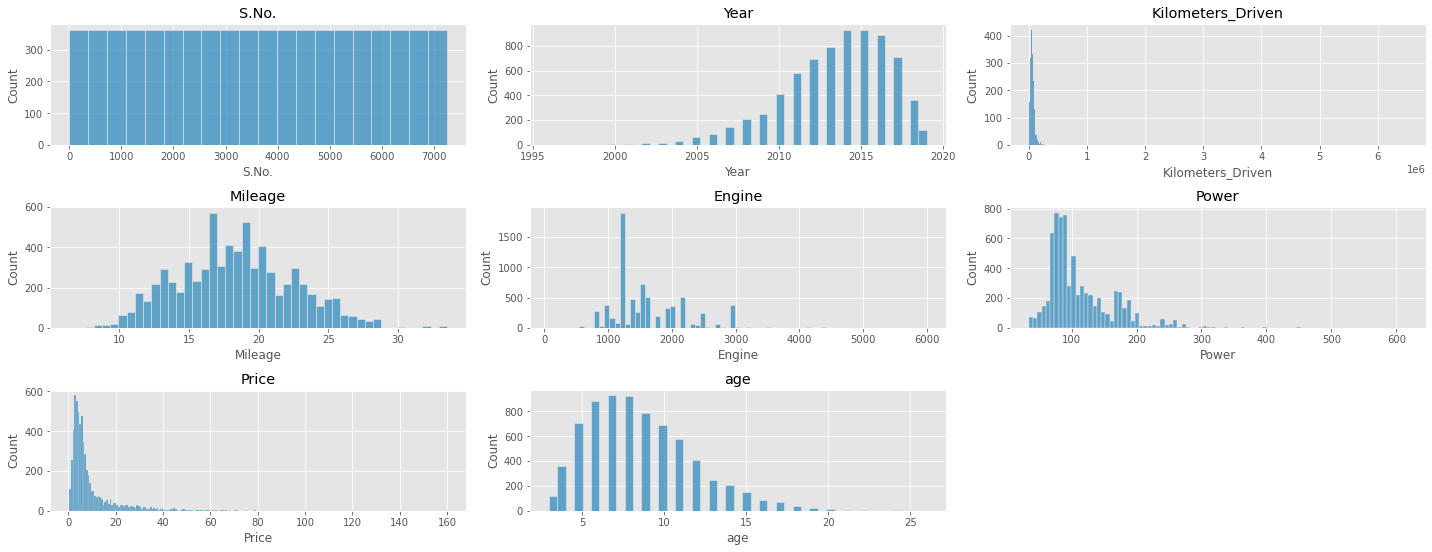

In [64]:
#EDA
# univarient analysis
plt.style.use("ggplot")
plt.figure(figsize=(20,20))
for i,variable in enumerate(numerical_columns):
    plt.subplot(8,3,i+1)
    sns.histplot(cars[variable],kde=False)
    plt.title(variable)
    plt.tight_layout()

In [66]:
cars.describe(include="O")

,Name,Location,New_Price,Brand,Model,cat_age
count,7253,7253,1006,7253,7252,7253
unique,2041,11,625,33,726,2
top,Mahindra XUV500 W8 2WD,Mumbai,4.78 Lakh,Maruti,Swift Dzire,old
freq,55,949,6,1444,189,6773


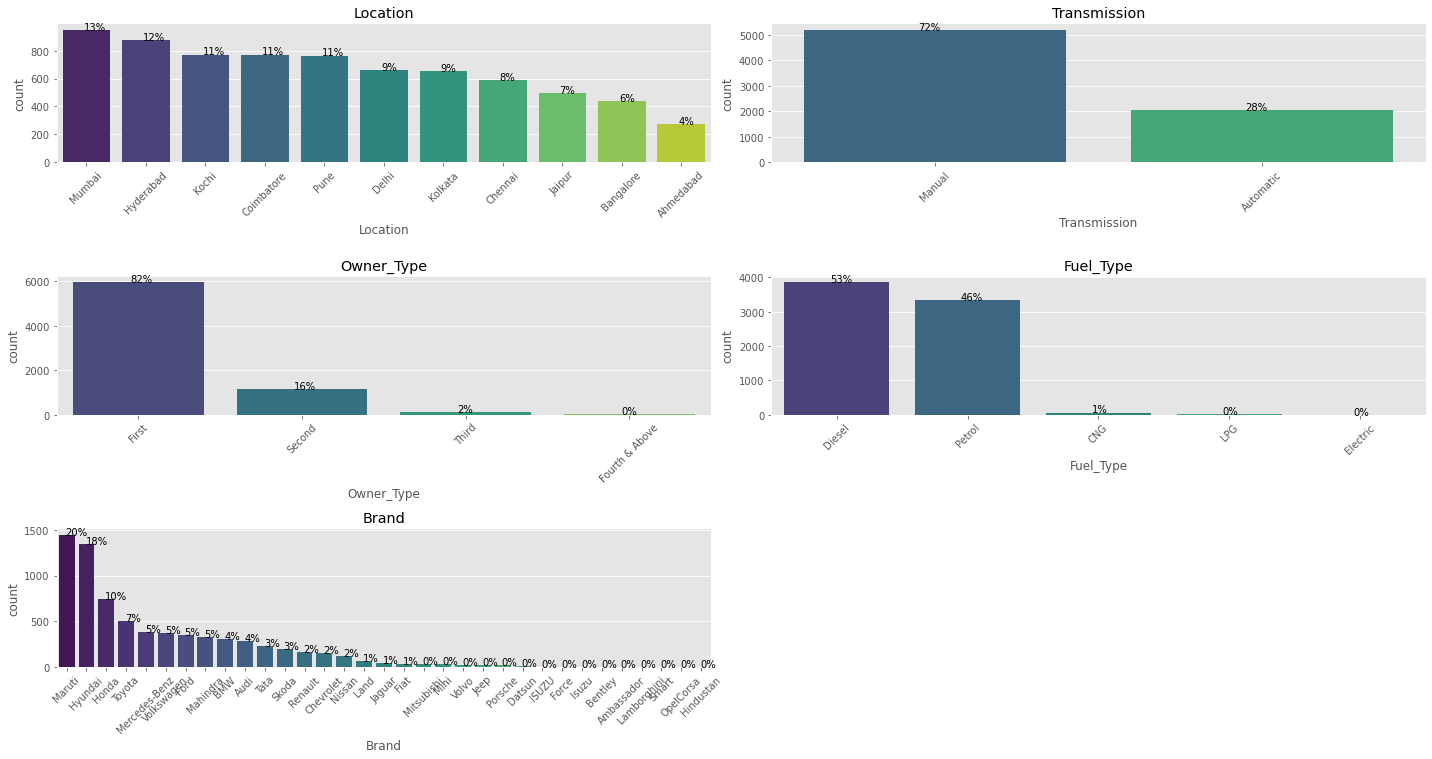

In [73]:
# oultier detection 
#categorical columns
cat_columns=["Location",'Transmission',"Owner_Type","Fuel_Type","Brand"]
plt.figure(figsize=(20,20))
for i ,variable in enumerate(cat_columns):
    plt.subplot(6,2,i+1)
    order=cars[variable].value_counts().index
    ax=sns.countplot(x=cars[variable],data=cars,order=order,palette="viridis")
    for p in ax.patches:
        per='{:.0f}%'.format(100*p.get_height()/len(cars[variable]))
        x=p.get_x()+p.get_width()/2-0.05
        y=p.get_y()+p.get_height()
        plt.annotate(per,(x,y))
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.title(variable)
        

In [74]:
# clean data (categorical features,numerical features)
# feature extraction 
# EDA (univeriate analysis)
# EDA (bivariate analysis)
# imputing dataset
# modeling (train_test)'
# start from number one another assumption

In [78]:
# bivariante analysis
numerical_columns=[ 'Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'age']

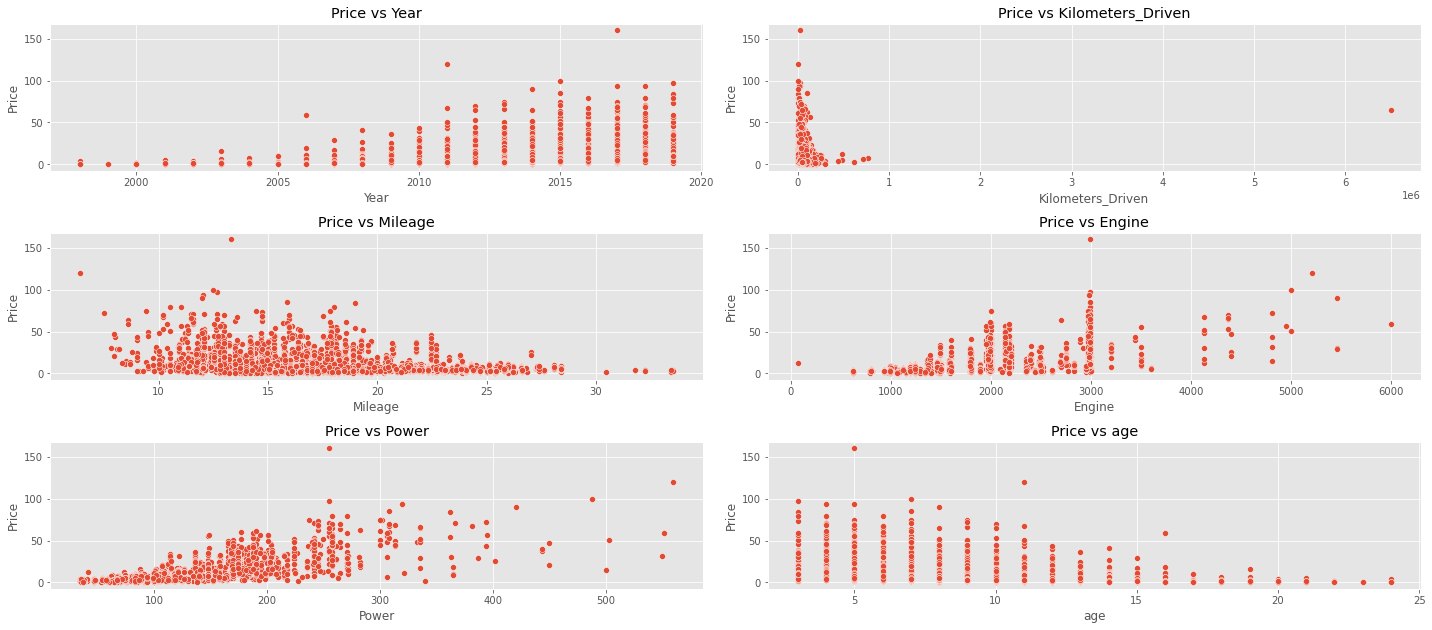

In [79]:
plt.figure(figsize=(20,20))
for i ,var in enumerate(numerical_columns):
    plt.subplot(7,2,i+1)
    sns.scatterplot(x=cars[var],y=cars["Price"])
    plt.title("Price vs "+var)
    plt.tight_layout()

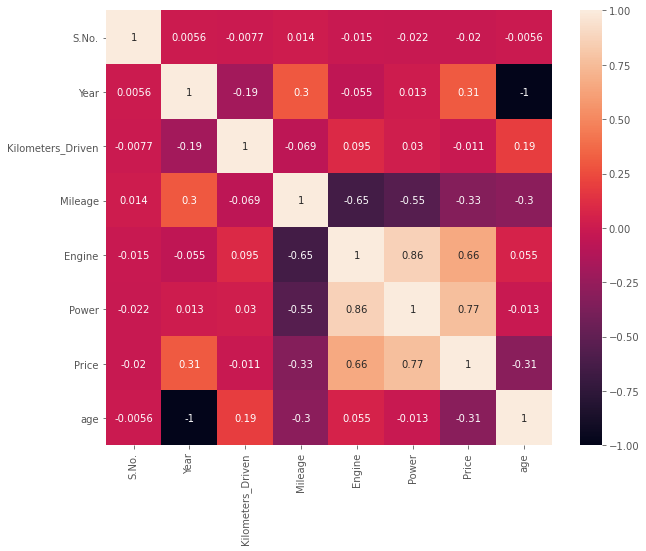

In [80]:

plt.figure(figsize=(10,8))
sns.heatmap(cars.corr(),annot=True)
plt.show()

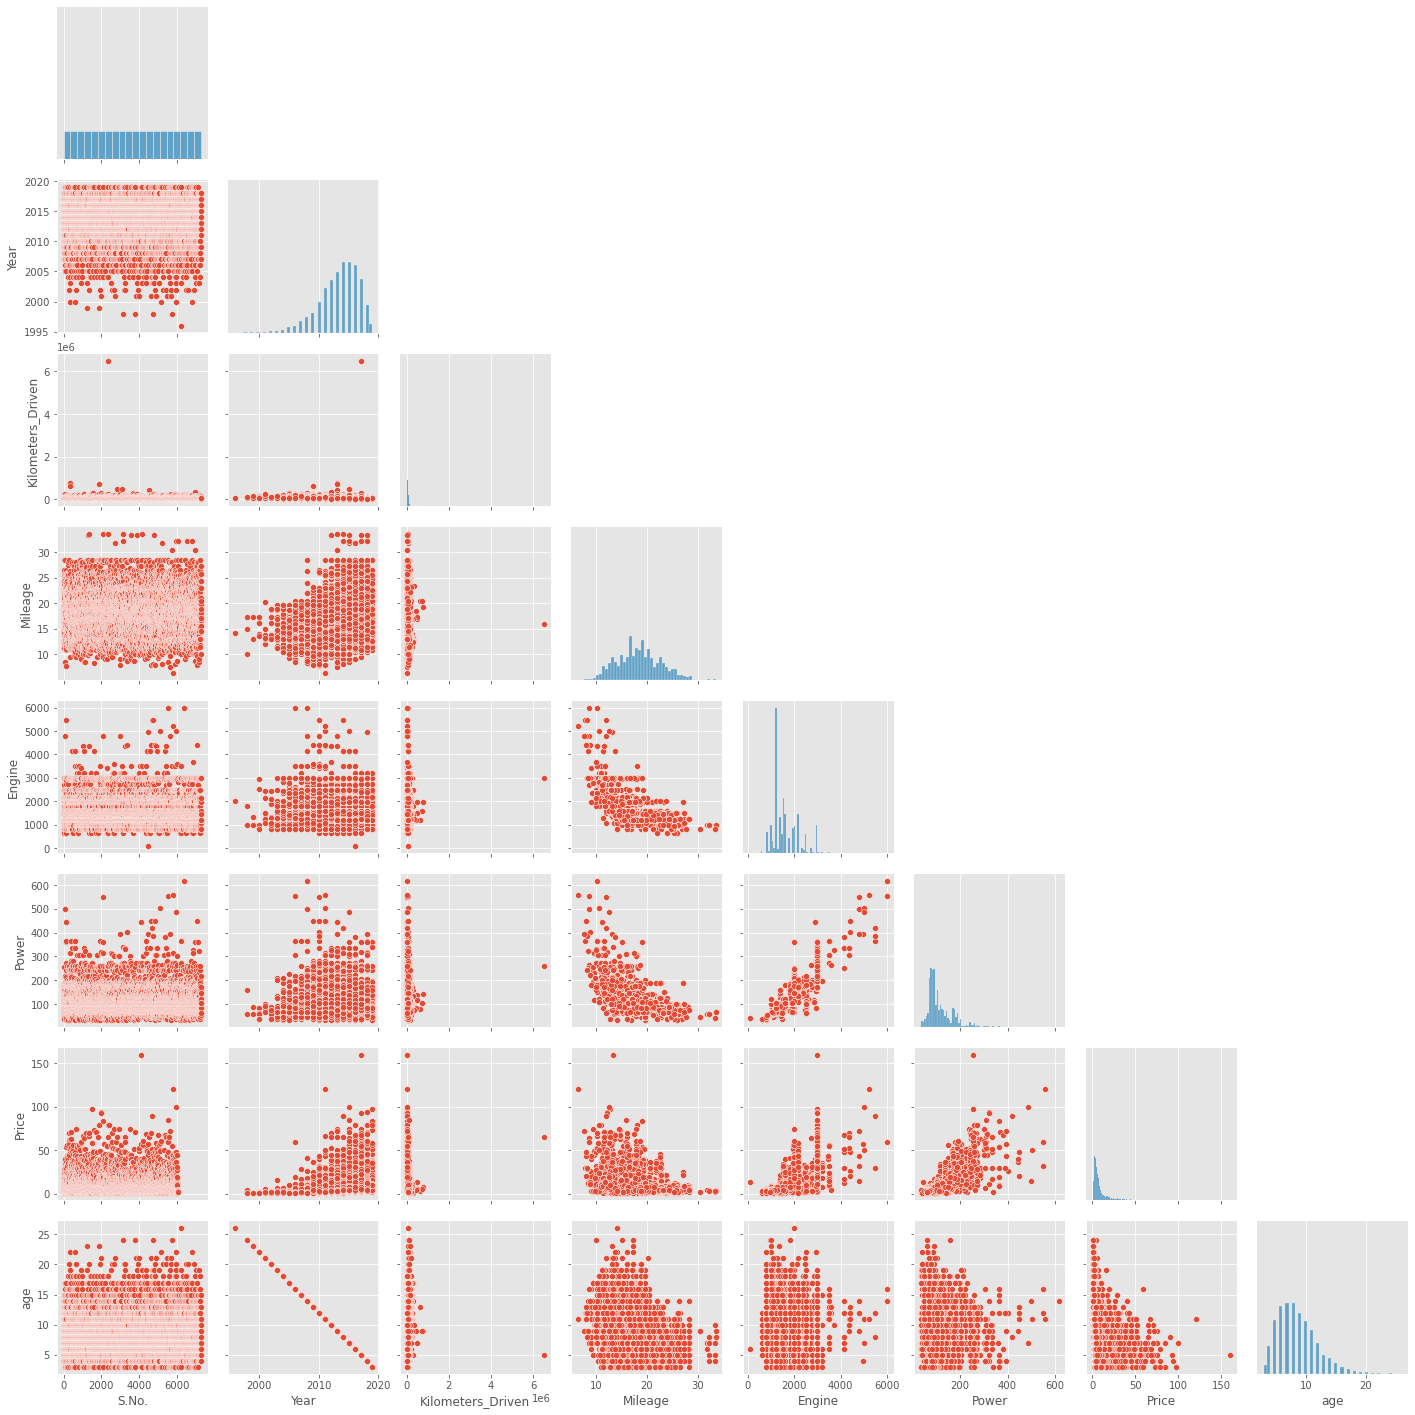

In [81]:
sns.pairplot(data=cars,corner=True)
plt.show()

In [100]:
# car.Engine.fillna(cars.Engine.median(),inplace=True)
cars["Mileage"]=cars.groupby(["Year"])["Mileage"].apply(lambda x:x.fillna(x.median()))


In [105]:
cars.Seats.mode()[0]

5.0

In [106]:
cars.Seats.fillna(cars.Seats.mode()[0],inplace=True)

In [101]:
cars[["Engine","Power","Mileage"]].isna().sum()

Engine     0
Power      0
Mileage    0
dtype: int64

In [110]:
# domain knowledge
cars.isna().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
age                  0
Brand                0
Model                0
cat_age              0
dtype: int64

In [108]:
del cars["New_Price"]

In [109]:
cars.dropna(inplace=True,axis=0)

In [116]:
Low=['Maruti', 
     'Hyundai',
     'Ambassdor',
     'Hindustan',
     'Force',
     'Chevrolet',
     'Fiat',
     'Tata',
     'Smart',
     'Renault',
     'Datsun',
     'Mahindra',
     'Skoda',
     'Ford',
     'Toyota',
     'Isuzu',
     'Mitsubishi','Honda','ISUZU','Ambassador']

High=['Audi',
      'Mini Cooper',
      'Bentley',
      'Mercedes-Benz',
      'Lamborghini',
      'Volkswagen',
      'Porsche',
      'Land Rover',
      'Nissan',
      'Volvo',
      'Jeep',
      'Jaguar',
      'BMW','Mini','Land']

In [117]:
def classrange(x):
    if x in Low:
        return "Low"
    elif x in High:
        return "High"
    else:
        return x

In [118]:
cars["Brand_class"]=cars["Brand"].apply(classrange)

In [119]:
cars.Brand_class.value_counts()

Low     4610
High    1409
Name: Brand_class, dtype: int64

In [120]:
cars.Brand_class=cars.Brand_class.astype("category")

In [150]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           6019 non-null   object  
 1   Kilometers_Driven  6019 non-null   int64   
 2   Fuel_Type          6019 non-null   category
 3   Transmission       6019 non-null   category
 4   Owner_Type         6019 non-null   category
 5   Mileage            6019 non-null   float64 
 6   Engine             6019 non-null   float64 
 7   Power              6019 non-null   float64 
 8   Seats              6019 non-null   category
 9   Price              6019 non-null   float64 
 10  age                6019 non-null   int64   
 11  Brand              6019 non-null   object  
 12  Model              6019 non-null   object  
 13  cat_age            6019 non-null   object  
 14  Brand_class        6019 non-null   category
dtypes: category(5), float64(4), int64(2), object(4)
memory 

In [122]:
cars.drop(['S.No.','Name','Year'],axis=1,inplace=True)

In [149]:
cars.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,age,Brand,Model,cat_age,Brand_class
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,12,Maruti,Wagon R,old,Low
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,7,Hyundai,Creta 1.6,old,Low
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,11,Honda,Jazz V,old,Low
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,10,Maruti,Ertiga VDI,old,Low
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,9,Audi,A4 New,old,High


In [124]:
def encode_cat(x):
    x=pd.get_dummies(x,columns=x.select_dtypes(include=["object","category"]).columns.tolist(),drop_first=True)
    return x

In [125]:
X=encode_cat(cars)

In [127]:
X.head()

,Kilometers_Driven,Mileage,Engine,Power,Price,age,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Model_i20 Active,Model_i20 Asta,Model_i20 Diesel,Model_i20 Era,Model_i20 Magna,Model_i20 Sportz,Model_redi-GO S,Model_redi-GO T,cat_age_old,Brand_class_Low
0,72000,26.60,998.0,58.16,1.75,12,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,41000,19.67,1582.0,126.20,12.50,7,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,46000,18.20,1199.0,88.70,4.50,11,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,87000,20.77,1248.0,88.76,6.00,10,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
4,40670,15.20,1968.0,140.80,17.74,9,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [132]:

from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.linear_model import Lasso,Ridge,ElasticNet #Lasso Regression
from sklearn.tree import DecisionTreeRegressor #Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest Regression
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score #Score cross validation
from sklearn.model_selection import GridSearchCV #Hyper parameter tuning

In [133]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=7)

In [139]:
model=RandomForestRegressor(n_estimators=10)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9767556451615287

In [148]:
model.predict(test1.reshape(1,-1))

array([1.749])

In [147]:
test1=X.loc[0].values

In [145]:
X.head()

,Kilometers_Driven,Mileage,Engine,Power,Price,age,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Model_i20 Active,Model_i20 Asta,Model_i20 Diesel,Model_i20 Era,Model_i20 Magna,Model_i20 Sportz,Model_redi-GO S,Model_redi-GO T,cat_age_old,Brand_class_Low
0,72000,26.60,998.0,58.16,1.75,12,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,41000,19.67,1582.0,126.20,12.50,7,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,46000,18.20,1199.0,88.70,4.50,11,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,87000,20.77,1248.0,88.76,6.00,10,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
4,40670,15.20,1968.0,140.80,17.74,9,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [146]:
cars.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,age,Brand,Model,cat_age,Brand_class
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,12,Maruti,Wagon R,old,Low
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,7,Hyundai,Creta 1.6,old,Low
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,11,Honda,Jazz V,old,Low
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,10,Maruti,Ertiga VDI,old,Low
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,9,Audi,A4 New,old,High


In [ ]:
# how to pipeline this model
# pca